# Modelos pre-entrenados VGG-19/NASNetLarge

- Objetivo: Utilizar una red pre-entrenada para reconocimiento de objetos. Se comprobará el desempeño de algunas arquitecturas como VGG-19 y NASNetLarge.




https://keras.io/applications/

- VGG-19 es una red neuronal convolucional de 19 capas de profundidad Fully Connected Layer que puede clasificar imágenes en 1000 categorías. La red se desarrolló por Visual Geometry Group (VGG) y está entrenada en el dataset 'ImageNet'.

    - https://arxiv.org/abs/1409.1556 
    - http://www.robots.ox.ac.uk/~vgg/

- NASNetLarge es una red también entrenada en 'ImageNet' que ha obtenido buenos resultados
    - https://arxiv.org/abs/1707.07012

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, array_to_img, load_img

from tensorflow.keras.preprocessing import image

## VGG19 
- Cada red debe importar 'decode_predictions' 

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import decode_predictions, preprocess_input


In [3]:
vgg = VGG19(include_top=True, weights='imagenet')


In [4]:
from IPython.display import display, Image


## Leer Imágenes

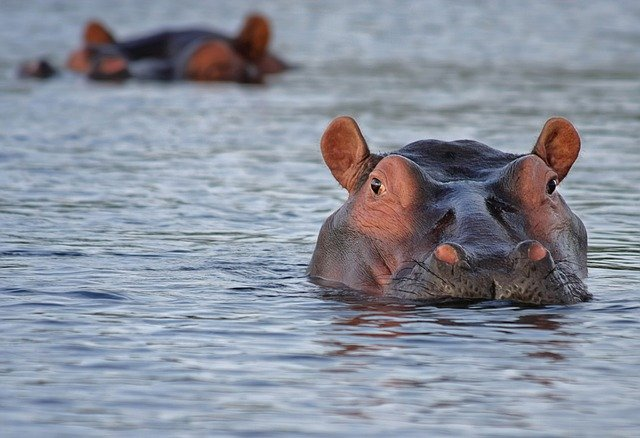

In [5]:
display(Image(filename='hp.jpg'))

## Función para leer imágenes

In [6]:
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)

    return img[tf.newaxis, :]

In [7]:
x = load_img('hp.jpg')
x = preprocess_input(x*255)

x = tf.image.resize(x, (224, 224))

features = vgg(x)


- 5 primeras etiquetas 

In [8]:
predicted_top_5 =  decode_predictions(features.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('hippopotamus', 0.99999416),
 ('armadillo', 3.4112575e-06),
 ('hog', 1.3947839e-06),
 ('American_coot', 1.827417e-07),
 ('warthog', 1.8164341e-07)]

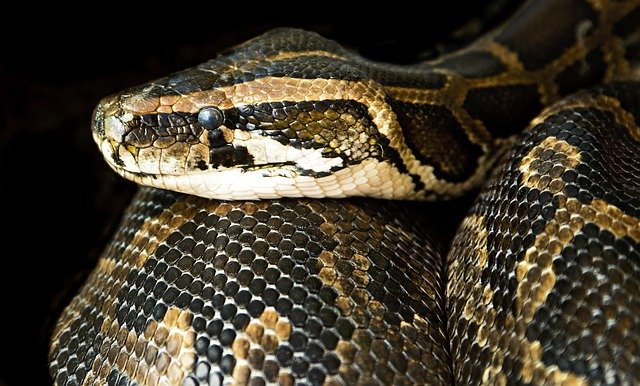

In [9]:
display(Image(filename='pr.jpg'))

In [10]:
x = load_img('pr.jpg')

x = preprocess_input(x*255)

x = tf.image.resize(x, (224, 224))


features = vgg(x)


- 5 primeras etiquetas 

In [11]:
predicted_top_5 =  decode_predictions(features.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('rock_python', 0.8633698),
 ('boa_constrictor', 0.09225663),
 ('night_snake', 0.021874327),
 ('hognose_snake', 0.011194411),
 ('king_snake', 0.008277133)]

# NASNetLarge
- Se modifica 'target_size'

In [12]:
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.nasnet import decode_predictions, preprocess_input

In [13]:
nas = NASNetLarge(include_top=True, weights='imagenet')

## Imagen 1

In [14]:
x = load_img('hp.jpg')


x = preprocess_input(x*332)

x = tf.image.resize(x, (331, 331))


features = nas(x)


In [15]:
predicted_top_5 =  decode_predictions(features.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('hippopotamus', 0.9321972),
 ('face_powder', 0.00037513342),
 ('dugong', 0.00031095117),
 ('switch', 0.00026751906),
 ('chimpanzee', 0.00022761109)]

## Imagen 2

In [16]:
x = load_img('pr.jpg')


x = preprocess_input(x*332)

x = tf.image.resize(x, (331, 331))


features = nas(x)


In [17]:
predicted_top_5 =  decode_predictions(features.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('rock_python', 0.85519165),
 ('boa_constrictor', 0.028593719),
 ('night_snake', 0.012484011),
 ('horned_viper', 0.0012726327),
 ('king_snake', 0.0011572422)]

- Cada red parece dar diferentes probabilidades a las imágenes
- Explorar y comparar otros modelos pre-entrenados